<a href="https://colab.research.google.com/github/whyonce/testgit/blob/main/chatchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow

print(tensorflow.__version__)

2.8.2


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import tensorflow_datasets as tfds
import re
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_table('/content/drive/MyDrive/chat/ChatbotData.csv')

In [ ]:
data

,"Q,A,label"
0,"12시 땡!,하루가 또 가네요.,0"
1,"1지망 학교 떨어졌어,위로해 드립니다.,0"
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0"
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0"
4,"PPL 심하네,눈살이 찌푸려지죠.,0"
...,...
11818,"훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2"
11819,"훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2"
11820,"흑기사 해주는 짝남.,설렜겠어요.,2"
11821,"힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아..."


In [ ]:
data.head()

,"Q,A,label"
0,"12시 땡!,하루가 또 가네요.,0"
1,"1지망 학교 떨어졌어,위로해 드립니다.,0"
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0"
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0"
4,"PPL 심하네,눈살이 찌푸려지죠.,0"


In [ ]:
data.columns = ['text']

In [ ]:
data.head()

,text
0,"12시 땡!,하루가 또 가네요.,0"
1,"1지망 학교 떨어졌어,위로해 드립니다.,0"
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0"
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0"
4,"PPL 심하네,눈살이 찌푸려지죠.,0"


In [ ]:
data['Question'] = data.text.str.split(',').str[0]
data['Answer'] = data.text.str.split('.,').str[1]
data['Label'] = data.text.str.split('.,').str[2]

In [ ]:
data.head()

,text,Question,Answer,Label
0,"12시 땡!,하루가 또 가네요.,0",12시 땡!,하루가 또 가네요,0
1,"1지망 학교 떨어졌어,위로해 드립니다.,0",1지망 학교 떨어졌어,위로해 드립니다,0
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 놀러가고 싶다,여행은 언제나 좋죠,0
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠,0
4,"PPL 심하네,눈살이 찌푸려지죠.,0",PPL 심하네,눈살이 찌푸려지죠,0


In [ ]:
data = data.drop('text', axis = 1)

In [ ]:
data.head()

,Question,Answer,Label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [ ]:
data['Label'].max()

'헤어짐에도 준비가 필요할 거예요'

In [ ]:
data.shape

(11823, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      11823 non-null  object
 1   Question  11823 non-null  object
 2   Answer    11823 non-null  object
 3   Label     11823 non-null  object
dtypes: object(4)
memory usage: 369.6+ KB


In [ ]:
data.describe()

,text,Question,Answer,Label
count,11823,11823,11823,11823
unique,11823,11661,7762,62
top,"12시 땡!,하루가 또 가네요.,0",외로워,맛있게 드세요,0
freq,1,4,22,5273


In [ ]:
data['Label'].max()

'헤어짐에도 준비가 필요할 거예요.'

In [ ]:
data[(data['Label'] != '2') & (data['Label'] != '1') & (data['Label'] != '0')]

,text,Question,Answer,Label
26,"가족 있어?,""저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생...",가족 있어?,"""저를 만들어 준 사람을 부모",저랑 이야기해 주는 사람을 친구로 생각하고 있어요
27,"가족관계 알려 줘,""저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구...",가족관계 알려 줘,"""저를 만들어 준 사람을 부모",저랑 이야기해 주는 사람을 친구로 생각하고 있어요
35,"가족이 누구야?,""저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로...",가족이 누구야?,"""저를 만들어 준 사람을 부모",저랑 이야기해 주는 사람을 친구로 생각하고 있어요
265,"괜찮은 사람인데 사귀긴 싫어,""남자사람친구, 여자사람친구 하세요."",0",괜찮은 사람인데 사귀긴 싫어,"""남자사람친",여자사람친구 하세요.
463,"나 결정 잘 한거지?,""네, 이제 잘 해낼 차례예요."",0",나 결정 잘 한거지?,"""",이제 잘 해낼 차례예요.
...,...,...,...,...
10734,"연애를 오래하려면?,""고마워, 사랑해, 미안해 항상 표현해주세요."",2",연애를 오래하려면?,"""고마",사랑
10808,"오래 못 가는 연애,""연애는 문제가 있으면 문제를 해결 하기 위해 함께 노력하고 그...",오래 못 가는 연애,"""연애는 문제가 있으면 문제를 해결 하기 위해 함께 노력하고 그 속에서 더욱 단단해...",그 과정을 못 참고 피하기만 했나봅니다.
10831,"외국에도 썸 같은 개념이 있어?,""글쎄요, 사귀는 과정은 어디든 있을 거 같아요."",2",외국에도 썸 같은 개념이 있어?,"""글쎄",사귀는 과정은 어디든 있을 거 같아요.
10834,"요구하거나 제안했을 때 뭐라고 리액션해야할지 모르겠어,""생각이 너무 좋은 것 같고,...",요구하거나 제안했을 때 뭐라고 리액션해야할지 모르겠어,"""생각이 너무 좋은 것 같",왜 나는 그런 생각을 못했는지 등으로 크게 반응해보세요.


In [ ]:
data['text'][26]

'가족 있어?,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0'

In [ ]:
data['text'][27]

'가족관계 알려 줘,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0'

In [ ]:
data['Question'] = data.text.str.split(',').str[0]
data['Answer'] = data.text.str.split(',').str[1:-1]
data['Label'] = data.text.str.split(',').str[-1]

In [ ]:
data.head()

,text,Question,Answer,Label,Q,A,Q_len,A_len
0,"12시 땡!,하루가 또 가네요.,0",12시 땡!,[하루가 또 가네요.],0,12시 땡 !,하루가 또 가네요,8,13
1,"1지망 학교 떨어졌어,위로해 드립니다.,0",1지망 학교 떨어졌어,[위로해 드립니다.],0,1지망 학교 떨어졌어,위로해 드립니다,11,12
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 놀러가고 싶다,[여행은 언제나 좋죠.],0,3박4일 놀러가고 싶다,여행은 언제나 좋죠,12,14
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 정도 놀러가고 싶다,[여행은 언제나 좋죠.],0,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠,15,14
4,"PPL 심하네,눈살이 찌푸려지죠.,0",PPL 심하네,[눈살이 찌푸려지죠.],0,ppl 심하네,눈살이 찌푸려지죠,7,13


In [ ]:
data.describe()

,text,Question,Answer,Label
count,11823,11823,11823,11823
unique,11823,11661,7767,4
top,"12시 땡!,하루가 또 가네요.,0",외로워,[맛있게 드세요],0
freq,1,4,22,5290


In [ ]:
data[(data['Label'] != '2') & (data['Label'] != '1') & (data['Label'] != '0')]

,text,Question,Answer,Label,Q,A,Q_len,A_len
10676,"여지를 준 짝녀 버려야겠죠.,오해가 아니라면 정리하는게 덜 상처일 것 같아요.,2",여지를 준 짝녀 버려야겠죠.,[오해가 아니라면 정리하는게 덜 상처일 것 같아요.],2,여지를 준 짝녀 버려야겠죠 .,오해가 아니라면 정리하는게 덜 상처일 것 같아요,17,30


In [ ]:
data['Label'][10676]

'2   '

In [ ]:
data['text'][10676]

'여지를 준 짝녀 버려야겠죠.,오해가 아니라면 정리하는게 덜 상처일 것 같아요.,2   '

In [ ]:
data.dtypes

text        object
Question    object
Answer      object
Label       object
dtype: object

In [ ]:
data = data.astype({'Label':'int'})

In [ ]:
data.head()

,text,Question,Answer,Label,Q,A,Q_len,A_len
0,"12시 땡!,하루가 또 가네요.,0",12시 땡!,[하루가 또 가네요.],0,12시 땡 !,하루가 또 가네요,8,13
1,"1지망 학교 떨어졌어,위로해 드립니다.,0",1지망 학교 떨어졌어,[위로해 드립니다.],0,1지망 학교 떨어졌어,위로해 드립니다,11,12
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 놀러가고 싶다,[여행은 언제나 좋죠.],0,3박4일 놀러가고 싶다,여행은 언제나 좋죠,12,14
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 정도 놀러가고 싶다,[여행은 언제나 좋죠.],0,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠,15,14
4,"PPL 심하네,눈살이 찌푸려지죠.,0",PPL 심하네,[눈살이 찌푸려지죠.],0,ppl 심하네,눈살이 찌푸려지죠,7,13


In [ ]:
data.describe()

,Label,Q_len,A_len
count,11823.000000,11823.000000,11823.000000
mean,0.803180,13.515521,18.112831
std,0.812012,6.638902,6.881501
min,0.000000,1.000000,4.000000
25%,0.000000,9.000000,13.000000
50%,1.000000,12.000000,17.000000
75%,2.000000,17.000000,21.000000
max,2.000000,58.000000,86.000000


In [ ]:
data[(data['Label'] != 2) & (data['Label'] != 1) & (data['Label'] != 0)]

,text,Question,Answer,Label,Q,A,Q_len,A_len


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      11823 non-null  object
 1   Question  11823 non-null  object
 2   Answer    11823 non-null  object
 3   Label     11823 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 369.6+ KB


In [ ]:
data[data['Label'] == 0]

,text,Question,Answer,Label
0,"12시 땡!,하루가 또 가네요.,0",12시 땡!,[하루가 또 가네요],0
1,"1지망 학교 떨어졌어,위로해 드립니다.,0",1지망 학교 떨어졌어,[위로해 드립니다],0
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 놀러가고 싶다,[여행은 언제나 좋죠],0
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 정도 놀러가고 싶다,[여행은 언제나 좋죠],0
4,"PPL 심하네,눈살이 찌푸려지죠.,0",PPL 심하네,[눈살이 찌푸려지죠],0
...,...,...,...,...
5285,"힘내야지,응원합니다!,0",힘내야지,[응원합니다],0
5286,"힘든 것 좀 끝났으면,다 지나갈 거예요.,0",힘든 것 좀 끝났으면,[다 지나갈 거예요],0
5287,"힘든 시기가 지나갔으면,다 지나갈 거예요.,0",힘든 시기가 지나갔으면,[다 지나갈 거예요],0
5288,"힘든 데도 날 도와준 사람,잊지말고 보답하세요.,0",힘든 데도 날 도와준 사람,[잊지말고 보답하세요],0


In [ ]:
data[data['Label'] == 1]

,text,Question,Answer,Label
5290,"1000일 만난 여자친구와 이별,더 오래 만날 사람 만날 거예요.,1",1000일 만난 여자친구와 이별,[더 오래 만날 사람 만날 거예요],1
5291,"10년 연애. 헤어졌습니다.,더 공허함이 크시겠네요.,1",10년 연애. 헤어졌습니다.,[더 공허함이 크시겠네요],1
5292,"10년 연애사 되돌아보니 다 부질없네,더 좋은 사람 만나실 거예요.,1",10년 연애사 되돌아보니 다 부질없네,[더 좋은 사람 만나실 거예요],1
5293,"10년 연예의끝,더 마음이 허하겠어요.,1",10년 연예의끝,[더 마음이 허하겠어요],1
5294,"10년만나다 헤어지네,충분히 슬퍼하고 충분히 아파하다가 이겨내세요.,1",10년만나다 헤어지네,[충분히 슬퍼하고 충분히 아파하다가 이겨내세요],1
...,...,...,...,...
8855,"힘듭니다.,어떤 말도 위로가 되지 않겠지만 힘내세요.,1",힘듭니다.,[어떤 말도 위로가 되지 않겠지만 힘내세요],1
8856,"힘이 될런지 모르겠지만,어떤 말도 위로가 되지 않겠지만 힘내세요.,1",힘이 될런지 모르겠지만,[어떤 말도 위로가 되지 않겠지만 힘내세요],1
8857,"힘이 드네,어떤 말도 위로가 되지 않겠지만 힘내세요.,1",힘이 드네,[어떤 말도 위로가 되지 않겠지만 힘내세요],1
8858,"힘이 없어,힘내세요!,1",힘이 없어,[힘내세요],1


In [ ]:
data[data['Label'] == 2]

,text,Question,Answer,Label
8860,"짝사랑만큼 고통스러운 건 없겠지.,짝사랑 만큼 감정소모가 큰 건 없을 거예요.,2",짝사랑만큼 고통스러운 건 없겠지.,[짝사랑 만큼 감정소모가 큰 건 없을 거예요],2
8861,"1년 넘게 만났는데 지금도 불타올라,정열적인 사랑을 하고 있나봐요.,2",1년 넘게 만났는데 지금도 불타올라,[정열적인 사랑을 하고 있나봐요],2
8862,"1년 동거 중인데 계속 좋아,서로 깊게 알게되면서 더 좋아졌나봅니다.,2",1년 동거 중인데 계속 좋아,[서로 깊게 알게되면서 더 좋아졌나봅니다],2
8863,"1년 동거하고 결혼했어,축하합니다!,2",1년 동거하고 결혼했어,[축하합니다],2
8864,"1년 만났는데도 그 사람에 대해 잘 모르겠어,더 만나보세요.,2",1년 만났는데도 그 사람에 대해 잘 모르겠어,[더 만나보세요],2
...,...,...,...,...
11818,"훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2",훔쳐보는 것도 눈치 보임.,[티가 나니까 눈치가 보이는 거죠],2
11819,"훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2",훔쳐보는 것도 눈치 보임.,[훔쳐보는 거 티나나봐요],2
11820,"흑기사 해주는 짝남.,설렜겠어요.,2",흑기사 해주는 짝남.,[설렜겠어요],2
11821,"힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아...",힘든 연애 좋은 연애라는게 무슨 차이일까?,[잘 헤어질 수 있는 사이 여부인 거 같아요],2


In [ ]:
data['text'][26]

'가족 있어?,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생각하고 있어요",0'

In [ ]:
data.loc[26]

text        가족 있어?,"저를 만들어 준 사람을 부모님, 저랑 이야기해 주는 사람을 친구로 생...
Question                                               가족 있어?
Answer       ["저를 만들어 준 사람을 부모,  저랑 이야기해 주는 사람을 친구로 생각하고 있어요]
Label                                                       0
Name: 26, dtype: object

In [ ]:
# 전처리 함수
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()

    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    return sentence
print("슝=3")

슝=3


In [ ]:
data = data.astype({'Answer':'str'})

In [ ]:
len(data)
inputs, outputs = [], []
input, output = list(data['Question']), (data['Answer'])

In [ ]:
for i in range(len(data)):
  inputs.append(preprocess_sentence(input[i]))
  outputs.append(preprocess_sentence(output[i]))


In [ ]:
data['Q'] = inputs
data['A'] = outputs

In [ ]:
data['A'][0].strip("[" "]" "'" )

'하루가 또 가네요 . '

In [ ]:
data['A'] = data['A'].apply(lambda x: x.strip("[" "]" "'" ))

In [ ]:
data

,text,Question,Answer,Label,Q,A,Q_len,A_len
0,"12시 땡!,하루가 또 가네요.,0",12시 땡!,['하루가 또 가네요.'],0,12시 땡 !,하루가 또 가네요 .,8,13
1,"1지망 학교 떨어졌어,위로해 드립니다.,0",1지망 학교 떨어졌어,['위로해 드립니다.'],0,1지망 학교 떨어졌어,위로해 드립니다 .,11,12
2,"3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 놀러가고 싶다,['여행은 언제나 좋죠.'],0,3박4일 놀러가고 싶다,여행은 언제나 좋죠 .,12,14
3,"3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0",3박4일 정도 놀러가고 싶다,['여행은 언제나 좋죠.'],0,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠 .,15,14
4,"PPL 심하네,눈살이 찌푸려지죠.,0",PPL 심하네,['눈살이 찌푸려지죠.'],0,ppl 심하네,눈살이 찌푸려지죠 .,7,13
...,...,...,...,...,...,...,...,...
11818,"훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2",훔쳐보는 것도 눈치 보임.,['티가 나니까 눈치가 보이는 거죠!'],2,훔쳐보는 것도 눈치 보임 .,티가 나니까 눈치가 보이는 거죠 !,16,21
11819,"훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2",훔쳐보는 것도 눈치 보임.,['훔쳐보는 거 티나나봐요.'],2,훔쳐보는 것도 눈치 보임 .,훔쳐보는 거 티나나봐요 .,16,16
11820,"흑기사 해주는 짝남.,설렜겠어요.,2",흑기사 해주는 짝남.,['설렜겠어요.'],2,흑기사 해주는 짝남 .,설렜겠어요 .,13,9
11821,"힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아...",힘든 연애 좋은 연애라는게 무슨 차이일까?,['잘 헤어질 수 있는 사이 여부인 거 같아요.'],2,힘든 연애 좋은 연애라는게 무슨 차이일까 ?,잘 헤어질 수 있는 사이 여부인 거 같아요 .,25,27


In [ ]:
data.loc[0]

text        12시 땡!,하루가 또 가네요.,0
Question                 12시 땡!
Answer           ['하루가 또 가네요.']
Label                         0
Q                      12시 땡 ! 
A                  하루가 또 가네요 . 
Q_len                         8
A_len                        13
Name: 0, dtype: object

In [ ]:
inputs, outputs = data['Q'], data['A']

In [ ]:
print(inputs[0])
print(outputs[0])

12시 땡 ! 
하루가 또 가네요 . 


In [ ]:
# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(inputs + outputs, target_vocab_size=2**13)

In [ ]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print(START_TOKEN)
print(END_TOKEN)

[8367]
[8368]


In [ ]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8367]
END_TOKEN의 번호 : [8368]


In [ ]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(inputs[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(outputs[21])))

정수 인코딩 후의 21번째 질문 샘플: [5826, 605, 2498, 4172]
정수 인코딩 후의 21번째 답변 샘플: [2684, 7671, 8, 6378, 94, 1]


In [ ]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs, MAX_LENGTH):
    tokenized_inputs, tokenized_outputs = [], []
  
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)
  
    # 최대 길이 40으로 모든 데이터셋을 패딩
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
          tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
          tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
    return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


In [ ]:
data['Q_len'] = data['Q'].apply(lambda x: len(x))

In [ ]:
data['A_len'] = data['A'].apply(lambda x: len(x))

In [ ]:
data.describe()

,Label,Q_len,A_len
count,11823.000000,11823.000000,11823.000000
mean,0.803180,13.515521,17.088133
std,0.812012,6.638902,6.892559
min,0.000000,1.000000,1.000000
25%,0.000000,9.000000,12.000000
50%,1.000000,12.000000,16.000000
75%,2.000000,17.000000,20.000000
max,2.000000,58.000000,83.000000


In [ ]:
data['A'][0]

'하루가 또 가네요 . '

In [ ]:
data['Q'][0]

'12시 땡 ! '

In [ ]:
def dr(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = quartile_3 + 1.5 * IQR
    
    print(IQR)
    print(condition)
   

In [ ]:
dr(data['Q_len'])
dr(data['A_len'])

8.0
29.0
8.0
32.0


In [ ]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8369


In [ ]:
inputs1, outputs1 = tokenize_and_filter(inputs, outputs, 30)

In [ ]:
print('필터링 후의 질문 샘플 개수: {}'.format(len(inputs1)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(outputs1)))

필터링 후의 질문 샘플 개수: 11822
필터링 후의 답변 샘플 개수: 11822


In [ ]:
MAX_LENGTH = 30

# 모델 생성

In [ ]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        # 각도 배열 생성
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

        # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
        # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        # sin과 cosine이 교차되도록 재배열
        pos_encoding = tf.stack([sines, cosines], axis=0)
        pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
        pos_encoding = tf.reshape(pos_encoding, [position, d_model])

        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


In [ ]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    # 어텐션 가중치는 Q와 K의 닷 프로덕트
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # 가중치를 정규화
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # 패딩에 마스크 추가
    if mask is not None:
        logits += (mask * -1e9)

    # softmax적용
    attention_weights = tf.nn.softmax(logits, axis=-1)

    # 최종 어텐션은 가중치와 V의 닷 프로덕트
    output = tf.matmul(attention_weights, value)
    return output

print("슝=3")

슝=3


In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # Q, K, V에 각각 Dense를 적용합니다
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # 병렬 연산을 위한 머리를 여러 개 만듭니다
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
        concat_attention = tf.reshape(scaled_attention,
                                      (batch_size, -1, self.d_model))

        # 최종 결과에도 Dense를 한 번 더 적용합니다
        outputs = self.dense(concat_attention)

        return outputs
print("슝=3")

슝=3


In [ ]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


In [ ]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
          d_model, num_heads, name="attention")({
              'query': inputs,
              'key': inputs,
              'value': inputs,
              'mask': padding_mask
          })

    # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
          epsilon=1e-6)(inputs + attention)

    # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
          epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


In [ ]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(
          inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


In [ ]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
              'query': inputs,
              'key': inputs,
              'value': inputs,
              'mask': look_ahead_mask
        })

    # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
              'query': attention1,
              'key': enc_outputs,
              'value': enc_outputs,
              'mask': padding_mask
        })

    # 마스크드 멀티 헤드 어텐션의 결과는
    # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)
print("슝=3")

슝=3


In [ ]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')

    # 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
    # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

    # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    # Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)
print("슝=3")

슝=3


In [ ]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': inputs1,
        'dec_inputs': outputs1[:, :-1]
    },
    {
        'outputs': outputs1[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


In [ ]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
    # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
    # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더
    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    # 디코더
    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


In [ ]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3196672     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)
print("슝=3")

슝=3


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


Text(0.5, 0, 'Train Step')

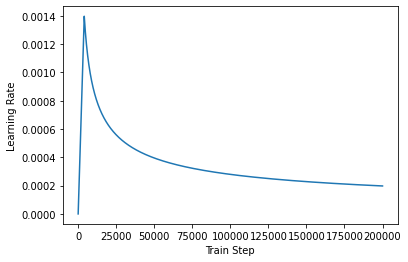

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


In [ ]:
EPOCHS = 20
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/20
185/185 [==============================] - 18s 48ms/step - loss: 1.9670 - accuracy: 0.0335
Epoch 2/20
185/185 [==============================] - 9s 47ms/step - loss: 1.5936 - accuracy: 0.0673
Epoch 3/20
185/185 [==============================] - 9s 47ms/step - loss: 1.3561 - accuracy: 0.0688
Epoch 4/20
185/185 [==============================] - 9s 47ms/step - loss: 1.2556 - accuracy: 0.0735
Epoch 5/20
185/185 [==============================] - 9s 47ms/step - loss: 1.1782 - accuracy: 0.0780
Epoch 6/20
185/185 [==============================] - 9s 48ms/step - loss: 1.0974 - accuracy: 0.0842
Epoch 7/20
185/185 [==============================] - 9s 49ms/step - loss: 1.0087 - accuracy: 0.0921
Epoch 8/20
185/185 [==============================] - 9s 50ms/step - loss: 0.9105 - accuracy: 0.1025
Epoch 9/20
185/185 [==============================] - 9s 49ms/step - loss: 0.8047 - accuracy: 0.1137
Epoch 10/20
185/185 [==============================] - 9s 49ms/step - loss: 0.6940 - accur

In [ ]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

    # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
    # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
          START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

    # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
    # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)

    # 디코더의 인퍼런스 단계
    for i in range(MAX_LENGTH):
        # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

        # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
        # 이 output_sequence는 다시 디코더의 입력이 됩니다.
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

    return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [ ]:
def sentence_generation(sentence):
    # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
    prediction = decoder_inference(sentence)

    # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
    predicted_sentence = tokenizer.decode(
          [i for i in prediction if i < tokenizer.vocab_size])

    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))

    return predicted_sentence
print("슝=3")

슝=3


In [ ]:
sentence_generation('나 피곤해')

입력 : 나 피곤해
출력 : 푹 쉬세요 . 


'푹 쉬세요 . '

# 컴터가 내 명치를 씨게 때렸다.

In [ ]:
sentence_generation('나랑 게임할래?')

입력 : 나랑 게임할래?
출력 : 괜찮은 선택이길 바라요 . 


'괜찮은 선택이길 바라요 . '

In [ ]:
sentence_generation('나랑 같이 놀래?')

입력 : 나랑 같이 놀래?
출력 : 지금 연락해보세요 . 


'지금 연락해보세요 . '

In [ ]:
sentence_generation('나 헤어졌어')

입력 : 나 헤어졌어
출력 : 좀 더 편하게 생각해보세요 . 


'좀 더 편하게 생각해보세요 . '

In [ ]:
sentence_generation('너 죽을래?')

입력 : 너 죽을래?
출력 : 저는 오래 살고 싶어요 . 


'저는 오래 살고 싶어요 . '